Python for STEM Teachers<br/>[Oregon Curriculum Network](http://4dsolutions.net/ocn/)


# BUILDING A PANDAS DATAFRAME

Welcome everyone.

In this very simple demo, I start with a listing of Polyhedrons with [volumes](https://codepen.io/pdx4d/pen/qjwORr) in increasing order.

In [1]:
import pandas as pd
import numpy as np

shapes = ['Tetrahedron', 'Cube', 'Octahedron', 'Rhombic Dodecahedron', 'Cuboctahedron']
table = pd.DataFrame([1,3,4,6,20], index = shapes)

In [2]:
table

,0
Tetrahedron,1
Cube,3
Octahedron,4
Rhombic Dodecahedron,6
Cuboctahedron,20


Unlike a numpy array, which is of uniform data type (example: all floating point), a pandas Dataframe is expected to have labels for both columns and rows.  The data columns themselves by be of varying type.  A Dataframe consists as an arrangement, left to right, of instances of the [pandas Series type](https://www.tutorialspoint.com/python_pandas/python_pandas_series.htm), i.e. the columns.

In [3]:
table.columns = ["Volume",] # relabel the one column

In [4]:
table

,Volume
Tetrahedron,1
Cube,3
Octahedron,4
Rhombic Dodecahedron,6
Cuboctahedron,20


$\phi = (1 + \sqrt{5})/2$

In [5]:
phi = (1 + np.sqrt(5))/2 # a constant aka "golden ratio"

Now comes our common need to add another row to our table.  

However the Icosahedron's volume is smaller than the Cuboctahedron's.  

How shall we maintain Volume order?

In [6]:
table.loc["Icosahedron","Volume"] = 5 * np.sqrt(2) * phi ** 2
shapes.append("Icosahedron")

In [7]:
table

,Volume
Tetrahedron,1.000000
Cube,3.000000
Octahedron,4.000000
Rhombic Dodecahedron,6.000000
Cuboctahedron,20.000000
Icosahedron,18.512296


Lets add one of a few interesting RTs (RT = rhombic triacontahedron).  The original Icosahedron, just added, has a dual with crossing edges that we'll also be adding.  Together, the Icosahedron and its intersecting Dual, the Pentagonal Dodecahedron, define an RT of tetravolume 

In [8]:
table.loc["RT5","Volume"] = 5
shapes.append("RT5")

In [9]:
byvolume = table.sort_values(by="Volume")

In [10]:
byvolume

,Volume
Tetrahedron,1.000000
Cube,3.000000
Octahedron,4.000000
RT5,5.000000
Rhombic Dodecahedron,6.000000
Icosahedron,18.512296
Cuboctahedron,20.000000


The concentric hierarchy icosahedron, obtained by jitterbugging the Cuboctahedron of volume 20, has a volume of:

$$ 5 \sqrt{2}\phi^{2} $$

In [11]:
byvolume["Avols"] = byvolume["Volume"] * 24  # A = B = T = 1/24

In [12]:
byvolume

,Volume,Avols
Tetrahedron,1.000000,24.000000
Cube,3.000000,72.000000
Octahedron,4.000000,96.000000
RT5,5.000000,120.000000
Rhombic Dodecahedron,6.000000,144.000000
Icosahedron,18.512296,444.295101
Cuboctahedron,20.000000,480.000000


In [13]:
penta_dodeca = 3 * np.sqrt(2) * (phi**2 + 1)
shapes.append("Pentagonal Dodeca")
penta_dodeca

15.350018208050784

In [14]:
byvolume.loc["Pentagonal Dodeca","Volume"] = penta_dodeca
byvolume.loc["Pentagonal Dodeca","Avols"] = penta_dodeca * 24

In [15]:
SuperRT = 20 * np.sqrt(9/8) # S3

In [16]:
SuperRT

21.213203435596423

In [17]:
byvolume.loc["SuperRT", "Volume"] = SuperRT
byvolume.loc["SuperRT", "Avols"] = SuperRT *24
shapes.append("SuperRT")

In [18]:
byvolume

,Volume,Avols
Tetrahedron,1.000000,24.000000
Cube,3.000000,72.000000
Octahedron,4.000000,96.000000
RT5,5.000000,120.000000
Rhombic Dodecahedron,6.000000,144.000000
Icosahedron,18.512296,444.295101
Cuboctahedron,20.000000,480.000000
Pentagonal Dodeca,15.350018,368.400437
SuperRT,21.213203,509.116882


What other RTs might we want to add?  The RT of exactly 5 tetravolumes is not the SuperRT scaled down by phi in its linear dimensions, (1/phi) to the 3rd power by volume.  The latter has a volume of 5+ and a radius of 1 exactly, whereas the RT of 5 has a radius of 0.9994... that of the RT of 5+.

In [19]:
byvolume.loc["RTe", "Volume"] = byvolume.loc["SuperRT","Volume"] * phi**-3

In [20]:
byvolume.loc["RTe", "Avols"] = byvolume.loc["RTe", "Volume"] * 24

In [21]:
shapes.append("RTe") # RT of 120 E modules

In [22]:
byvolume.sort_values(by="Volume", inplace=True)

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/4883782209/in/photolist-NYVxaA-ujipN3-f75zUP-8ryECF-8ryEix-7pQH9f-7pLP7a-7mcmne-7cVLoM-5zTRjp-5zY9gA-7k4Eid-7k4Em5-7k4Ejf-7jZLhp-7jZLe2" title="Plane Nets"><img src="https://farm5.staticflickr.com/4098/4883782209_eb318edb3f.jpg" width="375" height="500" alt="Plane Nets"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

<div align="center">3D Print Me!</div>

In [23]:
byvolume

,Volume,Avols
Tetrahedron,1.000000,24.000000
Cube,3.000000,72.000000
Octahedron,4.000000,96.000000
RT5,5.000000,120.000000
RTe,5.007758,120.186193
Rhombic Dodecahedron,6.000000,144.000000
Pentagonal Dodeca,15.350018,368.400437
Icosahedron,18.512296,444.295101
Cuboctahedron,20.000000,480.000000
SuperRT,21.213203,509.116882


In [24]:
comments = pd.Series(index=shapes, dtype=str)

In [25]:
comments.loc["Tetrahedron"] = "unit of volume, self dual"
comments.loc["Cube"] = "intersected tetrahedron duals"
comments.loc["Octahedron"] = "cube dual"
comments.loc["Rhombic Dodecahedron"] = "space-filler, sphere container"
comments.loc["Cuboctahedron"] = "RD's dual"
comments.loc["Icosahedron"] = "Platonic, pent. dodeca's dual"
comments.loc["RT5"] = "120 T modules, radius 0.9994"
comments.loc["Pentagonal Dodeca"] = "Platonic, Icosa's dual"
comments.loc["RTe"] = "120 E modules, radius 1.0000"
comments.loc["SuperRT"] = "RTe scaled up to Phi radius"

In [26]:
comments.shape

(10,)

In [27]:
comments

Tetrahedron                  unit of volume, self dual
Cube                     intersected tetrahedron duals
Octahedron                                   cube dual
Rhombic Dodecahedron    space-filler, sphere container
Cuboctahedron                                RD's dual
Icosahedron              Platonic, pent. dodeca's dual
RT5                       120 T modules, radius 0.9994
Pentagonal Dodeca               Platonic, Icosa's dual
SuperRT                    RTe scaled up to Phi radius
RTe                       120 E modules, radius 1.0000
dtype: object

In [28]:
byvolume["Comments"] = comments

In [29]:
byvolume

,Volume,Avols,Comments
Tetrahedron,1.000000,24.000000,"unit of volume, self dual"
Cube,3.000000,72.000000,intersected tetrahedron duals
Octahedron,4.000000,96.000000,cube dual
RT5,5.000000,120.000000,"120 T modules, radius 0.9994"
RTe,5.007758,120.186193,"120 E modules, radius 1.0000"
Rhombic Dodecahedron,6.000000,144.000000,"space-filler, sphere container"
Pentagonal Dodeca,15.350018,368.400437,"Platonic, Icosa's dual"
Icosahedron,18.512296,444.295101,"Platonic, pent. dodeca's dual"
Cuboctahedron,20.000000,480.000000,RD's dual
SuperRT,21.213203,509.116882,RTe scaled up to Phi radius


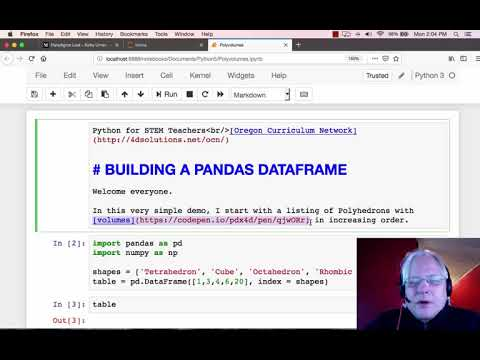

In [30]:
from IPython.display import YouTubeVideo
YouTubeVideo("RGH8m0LdaTM")

My video narrative could be a little more clear on how we're inserting rows in the same way we insert columns, but with ```.loc``` for adding the new labeling.  In general, consider embedding videos in your Notebooks if you think these could be helpful to those making use of it down the road.